<a href="https://colab.research.google.com/github/sury1999/Data-Analysis-Excercises/blob/main/Demographic_Data_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**FREECODECAMP DATA ANALYSIS PROJECT #2**
##**DEMOGRAPHIC DATA VISUALIZER** 

**Assignment**:
**Demographic Data Analyzer**

In this challenge you must analyze demographic data using Pandas. You are given a dataset of demographic data that was extracted from the 1994 Census database. Here is a sample of what the data looks like:



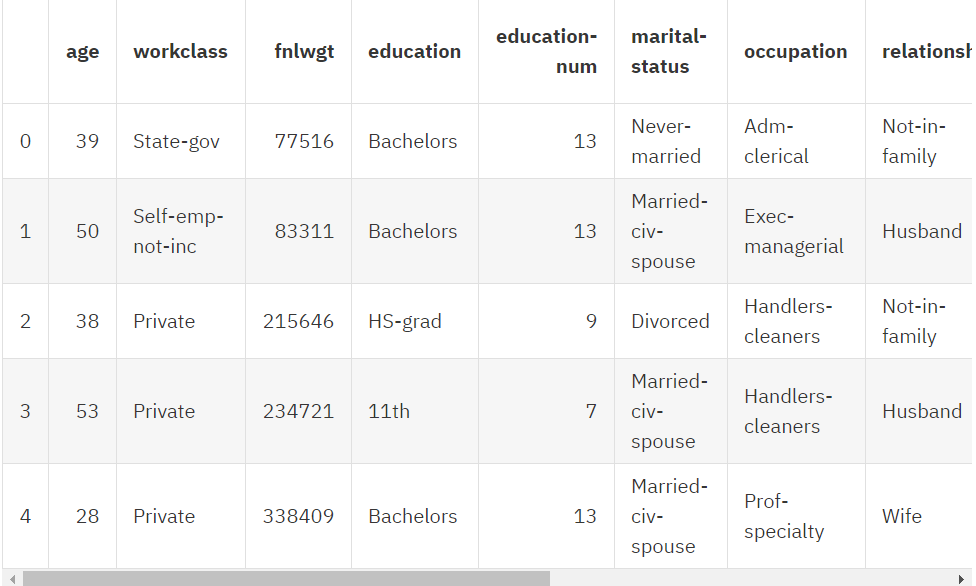

**You must use Pandas to answer the following questions:**

*  How many people of each race are represented in this dataset? This should be a Pandas series with race names as the index labels. (race column)
*   What is the average age of men?
*  What is the percentage of people who have a Bachelor's degree?
*  What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?
*  What percentage of people without advanced education make more than 50K?
*  What is the minimum number of hours a person works per week?
*  What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?
*  What country has the highest percentage of people that earn >50K and what is that percentage?
*  Identify the most popular occupation for those who earn >50K in India.

**Round all decimals to the nearest tenth.**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [56]:
demo_data = pd.read_csv('/adult_data.csv')
demo_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##Q1: How many people of each race are represented in this dataset? This should be a Pandas series with race names as the index labels. (race column)


In [3]:
race_types = pd.Series(demo_data['race'].value_counts())
race_types

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

##Q2: What is the average age of men?

In [4]:
mask = demo_data['sex'] == 'Male'
male_avg = demo_data[mask].mean().age
male_avg

39.43354749885268

##Q3: What is the percentage of people who have a Bachelor's degree?

In [5]:
percent_bachelor_degree = (demo_data[demo_data['education'] == 'Bachelors'].shape[0]) / (demo_data.shape[0]) * 100
percent_bachelor_degree


16.44605509658794

##Q4: What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?

In [6]:
mask1 = (demo_data['salary'] == '>50K') & (demo_data['education'].isin(['Bachelors', 'Masters', 'Doctorate']))
mask2 = demo_data['education'].isin(['Bachelors', 'Masters', 'Doctorate'])
rich_and_smart = (demo_data[mask1].shape[0] / demo_data[mask2].shape[0]) * 100
rich_and_smart

46.535843011613935

##Q5: What percentage of people without advanced education make more than 50K?


In [26]:
mask3 = ~demo_data['education'].isin(['Bachelors', 'Masters', 'Doctorate'])
mask4 = (demo_data['salary'] == '>50K') & (~demo_data['education'].isin(['Bachelors', 'Masters', 'Doctorate']))
rich_and_no_degree =(demo_data[mask4].shape[0] / demo_data[mask3].shape[0]) * 100
rich_and_no_degree


17.3713601914639

##Q6: What is the minimum number of hours a person works per week?

In [27]:
demo_data['hours-per-week'].min()

1

##Q7: What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?

In [55]:
cond1 = (demo_data['hours-per-week'] == 1) & (demo_data['salary'] == '>50K')
cond2 = demo_data['hours-per-week'] == 1
no_work_and_high_pay = (demo_data[cond1].shape[0] / demo_data[cond2].shape[0]) * 100
no_work_and_high_pay

10.0

##Q8: What country has the highest percentage of people that earn >50K and what is that percentage?

In [73]:
demo_data[demo_data['salary' == '>50K'].groupby('native-country')]['native-country'].count()

KeyError: ignored

##Q9: Identify the most popular occupation for those who earn >50K in India.




In [114]:
final = (demo_data['native-country'] == 'India') & (demo_data['salary'] == '>50K')
t1 = demo_data[final].groupby('occupation')['occupation'].value_counts().max()
t1
t2 = demo_data['occupation'].value_counts()
t2

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64